### Data Preprocessing - Combined Dataset

In [11]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Reading the dataset
data = pd.read_csv('data/dataset.csv')
data.head()

,domain,designation,age,degree,cs_bg,experience,avg_time,holidays,week_back,city,...,linux,sas,vercel,redux,api,bootstrap,mongoose,tailwind,docker,salary
0,web development using python django,software engineer,22.0,No Degree,No,No,9.0,No,0.0,bangalore,...,0,0,0,0,0,0,0,0,0,3.00
1,web development using node.js express,software engineer,21.0,Degree,No,No,12.0,No,2.0,wfh,...,0,0,0,0,0,0,0,0,0,2.16
2,web development using python django,nodejs developer,22.0,Degree,Yes,No,9.0,Yes,4.0,bangalore,...,0,0,0,0,0,0,0,0,0,2.40
3,mern stack,software developer,23.0,No Degree,No,No,11.0,Yes,7.0,chennai,...,0,0,0,0,0,0,0,0,0,3.55
4,web development using python django,software engineer,22.0,No Degree,No,No,10.0,No,4.0,bangalore,...,0,0,0,0,0,0,0,0,0,2.40


In [3]:
data.columns

Index(['domain', 'designation', 'age', 'degree', 'cs_bg', 'experience',
       'avg_time', 'holidays', 'week_back', 'city', 'graduated', 'flutter',
       'angular', 'python', 'express', 'firebase', 'aws', 'sql', 'javascript',
       'jwt', 'node', 'html', 'ajax', 'hasura', 'communication', 'git', 'jest',
       'mysql', 'react', 'graphql', 'mongodb', 'cnn', 'postman', 'nginx',
       'dart', 'vim', 'django', 'mui', 'typescript', 'opencv', 'jquery',
       'next', 'linux', 'sas', 'vercel', 'redux', 'api', 'bootstrap',
       'mongoose', 'tailwind', 'docker', 'salary'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         669 non-null    object 
 1   designation    669 non-null    object 
 2   age            669 non-null    float64
 3   degree         669 non-null    object 
 4   cs_bg          669 non-null    object 
 5   experience     669 non-null    object 
 6   avg_time       669 non-null    float64
 7   holidays       669 non-null    object 
 8   week_back      669 non-null    float64
 9   city           669 non-null    object 
 10  graduated      669 non-null    object 
 11  flutter        669 non-null    int64  
 12  angular        669 non-null    int64  
 13  python         669 non-null    int64  
 14  express        669 non-null    int64  
 15  firebase       669 non-null    int64  
 16  aws            669 non-null    int64  
 17  sql            669 non-null    int64  
 18  javascript

We can drop the column `city` as it has misentries from imputation.

In [5]:
# Dropping the column city
data = data.drop('city', axis=1)
data.head()

,domain,designation,age,degree,cs_bg,experience,avg_time,holidays,week_back,graduated,...,linux,sas,vercel,redux,api,bootstrap,mongoose,tailwind,docker,salary
0,web development using python django,software engineer,22.0,No Degree,No,No,9.0,No,0.0,Yes,...,0,0,0,0,0,0,0,0,0,3.00
1,web development using node.js express,software engineer,21.0,Degree,No,No,12.0,No,2.0,Yes,...,0,0,0,0,0,0,0,0,0,2.16
2,web development using python django,nodejs developer,22.0,Degree,Yes,No,9.0,Yes,4.0,Yes,...,0,0,0,0,0,0,0,0,0,2.40
3,mern stack,software developer,23.0,No Degree,No,No,11.0,Yes,7.0,Yes,...,0,0,0,0,0,0,0,0,0,3.55
4,web development using python django,software engineer,22.0,No Degree,No,No,10.0,No,4.0,Yes,...,0,0,0,0,0,0,0,0,0,2.40


In [6]:
data.shape

(669, 51)

We have 669 rows and 51 columns

### Encoding Categorical Columns

1. Using **Label encoding** for `degree` column because it has a meaningful ordinal relationship

In [7]:
# Importing label encoder from sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

In [8]:
pre_data = data.copy()

pre_data['degree_encoded'] = label_encoder.fit_transform(pre_data['degree'])
pre_data.drop('degree', axis=1, inplace=True)
pre_data.head()

,domain,designation,age,cs_bg,experience,avg_time,holidays,week_back,graduated,flutter,...,sas,vercel,redux,api,bootstrap,mongoose,tailwind,docker,salary,degree_encoded
0,web development using python django,software engineer,22.0,No,No,9.0,No,0.0,Yes,0,...,0,0,0,0,0,0,0,0,3.00,2
1,web development using node.js express,software engineer,21.0,No,No,12.0,No,2.0,Yes,0,...,0,0,0,0,0,0,0,0,2.16,0
2,web development using python django,nodejs developer,22.0,Yes,No,9.0,Yes,4.0,Yes,0,...,0,0,0,0,0,0,0,0,2.40,0
3,mern stack,software developer,23.0,No,No,11.0,Yes,7.0,Yes,0,...,0,0,0,0,0,0,0,0,3.55,2
4,web development using python django,software engineer,22.0,No,No,10.0,No,4.0,Yes,0,...,0,0,0,0,0,0,0,0,2.40,2


In [9]:
pre_data['degree_encoded'].value_counts()

2    338
0    328
1      3
Name: degree_encoded, dtype: int64

  **Legend - degree_encoded**
  
    2 - No degree

    0 - Degree

    1 - Diploma

2. **One Hot Encoding** for `domain` column as the values has no meaningful order and each category is distinct 

In [25]:
pre_data.head()

,domain,designation,age,cs_bg,experience,avg_time,holidays,week_back,graduated,flutter,...,sas,vercel,redux,api,bootstrap,mongoose,tailwind,docker,salary,degree_encoded
0,web development using python django,software engineer,22.0,No,No,9.0,No,0.0,Yes,0,...,0,0,0,0,0,0,0,0,3.00,2
1,web development using node.js express,software engineer,21.0,No,No,12.0,No,2.0,Yes,0,...,0,0,0,0,0,0,0,0,2.16,0
2,web development using python django,nodejs developer,22.0,Yes,No,9.0,Yes,4.0,Yes,0,...,0,0,0,0,0,0,0,0,2.40,0
3,mern stack,software developer,23.0,No,No,11.0,Yes,7.0,Yes,0,...,0,0,0,0,0,0,0,0,3.55,2
4,web development using python django,software engineer,22.0,No,No,10.0,No,4.0,Yes,0,...,0,0,0,0,0,0,0,0,2.40,2


In [29]:
pre_data[['domain', 'cs_bg', 'experience', 'holidays', 'graduated']].head()

,domain,cs_bg,experience,holidays,graduated
0,web development using python django,No,No,No,Yes
1,web development using node.js express,No,No,No,Yes
2,web development using python django,Yes,No,Yes,Yes
3,mern stack,No,No,Yes,Yes
4,web development using python django,No,No,No,Yes


In [30]:
#categorical data
columns_to_encode = ['domain', 'cs_bg', 'experience', 'holidays', 'graduated']

# Encoding the categorical columns
pre_data = pd.get_dummies(pre_data, columns = columns_to_encode, drop_first = True)
pre_data.head()

,designation,age,avg_time,week_back,flutter,angular,python,express,firebase,aws,...,domain_mobile development using swift,domain_web development using node.js express,domain_web development using python django,domain_web development using python django + angular,domain_web development using python django + react,cs_bg_Yes,experience_No,experience_Yes [ Non IT industry ],holidays_Yes,graduated_Yes
0,software engineer,22.0,9.0,0.0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1,software engineer,21.0,12.0,2.0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
2,nodejs developer,22.0,9.0,4.0,0,1,0,1,0,0,...,0,0,1,0,0,1,1,0,1,1
3,software developer,23.0,11.0,7.0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
4,software engineer,22.0,10.0,4.0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1


In [32]:
print(pre_data.columns)

Index(['designation', 'age', 'avg_time', 'week_back', 'flutter', 'angular',
       'python', 'express', 'firebase', 'aws', 'sql', 'javascript', 'jwt',
       'node', 'html', 'ajax', 'hasura', 'communication', 'git', 'jest',
       'mysql', 'react', 'graphql', 'mongodb', 'cnn', 'postman', 'nginx',
       'dart', 'vim', 'django', 'mui', 'typescript', 'opencv', 'jquery',
       'next', 'linux', 'sas', 'vercel', 'redux', 'api', 'bootstrap',
       'mongoose', 'tailwind', 'docker', 'salary', 'degree_encoded',
       'domain_cybersecurity', 'domain_data science', 'domain_devops',
       'domain_frontend development using react',
       'domain_game development using unity', 'domain_golang',
       'domain_machine learning', 'domain_mean stack', 'domain_mern stack',
       'domain_mobile development using android kotlin',
       'domain_mobile development using flutter',
       'domain_mobile development using swift',
       'domain_web development using node.js express',
       'domain_web d

In [36]:
encoded_cols = ['domain_cybersecurity', 'domain_data science', 'domain_devops',
       'domain_frontend development using react',
       'domain_game development using unity', 'domain_golang',
       'domain_machine learning', 'domain_mean stack', 'domain_mern stack',
       'domain_mobile development using android kotlin',
       'domain_mobile development using flutter',
       'domain_mobile development using swift',
       'domain_web development using node.js express',
       'domain_web development using python django',
       'domain_web development using python django + angular',
       'domain_web development using python django + react', 'cs_bg_Yes',
       'experience_No', 'experience_Yes [ Non IT industry ]', 'holidays_Yes',
       'graduated_Yes']

pre_data[encoded_cols].head()

,domain_cybersecurity,domain_data science,domain_devops,domain_frontend development using react,domain_game development using unity,domain_golang,domain_machine learning,domain_mean stack,domain_mern stack,domain_mobile development using android kotlin,...,domain_mobile development using swift,domain_web development using node.js express,domain_web development using python django,domain_web development using python django + angular,domain_web development using python django + react,cs_bg_Yes,experience_No,experience_Yes [ Non IT industry ],holidays_Yes,graduated_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [38]:
# Renaming the columns
cols = {'domain_data science':'domain_data_science', 'domain_frontend development using react':'domain_frontend_react', 'domain_game development using unity': 'game_developemnt',
       'domain_machine learning': 'domain_machine_learning', 'domain_mean stack':'domain_mean', 'domain_mern stack': 'domain_mern', 'domain_mobile development using android kotlin':'domain_mob_dev_kotlin',
       'domain_mobile development using flutter':'domain_mobile_development_using_flutter', 'domain_mobile development using swift': 'domain_mob_dev_swift',
       'domain_web development using node.js express':'domain_webdev_nodejs', 'domain_web development using python django':'domain_webdev_django',
       'domain_web development using python django + angular':'domain_webdev_django_angular', 'domain_web development using python django + react':'domain_webdev_django_react'}

pre_data.rename(columns=cols, inplace=True)
pre_data.columns.values

array(['designation', 'age', 'avg_time', 'week_back', 'flutter',
       'angular', 'python', 'express', 'firebase', 'aws', 'sql',
       'javascript', 'jwt', 'node', 'html', 'ajax', 'hasura',
       'communication', 'git', 'jest', 'mysql', 'react', 'graphql',
       'mongodb', 'cnn', 'postman', 'nginx', 'dart', 'vim', 'django',
       'mui', 'typescript', 'opencv', 'jquery', 'next', 'linux', 'sas',
       'vercel', 'redux', 'api', 'bootstrap', 'mongoose', 'tailwind',
       'docker', 'salary', 'degree_encoded', 'domain_cybersecurity',
       'domain_data_science', 'domain_devops', 'domain_frontend_react',
       'game_developemnt', 'domain_golang', 'domain_machine_learning',
       'domain_mean', 'domain_mern', 'domain_mob_dev_kotlin',
       'domain_mobile_development_using_flutter', 'domain_mob_dev_swift',
       'domain_webdev_nodejs', 'domain_webdev_django',
       'domain_webdev_django_angular', 'domain_webdev_django_react',
       'cs_bg_Yes', 'experience_No', 'experience_Yes [ N

In [40]:
# Renaming the columns
cols = {'cs_bg_Yes':'cs_bg', 'experience_No':'experience_1', 'experience_Yes [ Non IT industry ]': 'experience_2',
       'holidays_Yes': 'holidays', 'graduated_Yes':'graduated'}
pre_data.rename(columns=cols, inplace=True)
pre_data.columns.values

array(['designation', 'age', 'avg_time', 'week_back', 'flutter',
       'angular', 'python', 'express', 'firebase', 'aws', 'sql',
       'javascript', 'jwt', 'node', 'html', 'ajax', 'hasura',
       'communication', 'git', 'jest', 'mysql', 'react', 'graphql',
       'mongodb', 'cnn', 'postman', 'nginx', 'dart', 'vim', 'django',
       'mui', 'typescript', 'opencv', 'jquery', 'next', 'linux', 'sas',
       'vercel', 'redux', 'api', 'bootstrap', 'mongoose', 'tailwind',
       'docker', 'salary', 'degree_encoded', 'domain_cybersecurity',
       'domain_data_science', 'domain_devops', 'domain_frontend_react',
       'game_developemnt', 'domain_golang', 'domain_machine_learning',
       'domain_mean', 'domain_mern', 'domain_mob_dev_kotlin',
       'domain_mobile_development_using_flutter', 'domain_mob_dev_swift',
       'domain_webdev_nodejs', 'domain_webdev_django',
       'domain_webdev_django_angular', 'domain_webdev_django_react',
       'cs_bg', 'experience_1', 'experience_2', 'holiday

### Legends
    1. cs_bg
        1 - Yes
        0 - No
        
    2. experience
        1 0 - No
        0 1 - Yes [ Non IT industry ]
        0 0 - Bca dropout
          
    3. holidays
        1 - Yes
        0 - No
          
     4. graduated
        1 - Yes
        0 - No

In [44]:
pre_data[['cs_bg', 'experience_1', 'experience_2', 'holidays', 'graduated']].describe().T

,count,mean,std,min,25%,50%,75%,max
cs_bg,669.0,0.484305,0.500128,0.0,0.0,0.0,1.0,1.0
experience_1,669.0,0.955157,0.207114,0.0,1.0,1.0,1.0,1.0
experience_2,669.0,0.041854,0.200404,0.0,0.0,0.0,0.0,1.0
holidays,669.0,0.508221,0.500306,0.0,0.0,1.0,1.0,1.0
graduated,669.0,0.820628,0.383951,0.0,1.0,1.0,1.0,1.0


3. Applying **Label Encoding** to `designation` as it has 137 unique values

In [45]:
pre_data.designation.nunique()

137

In [46]:
# Apply label encoding to 'designation' column
pre_data['designation_encoded'] = label_encoder.fit_transform(pre_data['designation'])
pre_data.head()

,designation,age,avg_time,week_back,flutter,angular,python,express,firebase,aws,...,domain_webdev_nodejs,domain_webdev_django,domain_webdev_django_angular,domain_webdev_django_react,cs_bg,experience_1,experience_2,holidays,graduated,designation_encoded
0,software engineer,22.0,9.0,0.0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,124
1,software engineer,21.0,12.0,2.0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,1,124
2,nodejs developer,22.0,9.0,4.0,0,1,0,1,0,0,...,0,1,0,0,1,1,0,1,1,95
3,software developer,23.0,11.0,7.0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,1,116
4,software engineer,22.0,10.0,4.0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,124


In [47]:
print(pre_data.columns.values)

['designation' 'age' 'avg_time' 'week_back' 'flutter' 'angular' 'python'
 'express' 'firebase' 'aws' 'sql' 'javascript' 'jwt' 'node' 'html' 'ajax'
 'hasura' 'communication' 'git' 'jest' 'mysql' 'react' 'graphql' 'mongodb'
 'cnn' 'postman' 'nginx' 'dart' 'vim' 'django' 'mui' 'typescript' 'opencv'
 'jquery' 'next' 'linux' 'sas' 'vercel' 'redux' 'api' 'bootstrap'
 'mongoose' 'tailwind' 'docker' 'salary' 'degree_encoded'
 'domain_cybersecurity' 'domain_data_science' 'domain_devops'
 'domain_frontend_react' 'game_developemnt' 'domain_golang'
 'domain_machine_learning' 'domain_mean' 'domain_mern'
 'domain_mob_dev_kotlin' 'domain_mobile_development_using_flutter'
 'domain_mob_dev_swift' 'domain_webdev_nodejs' 'domain_webdev_django'
 'domain_webdev_django_angular' 'domain_webdev_django_react' 'cs_bg'
 'experience_1' 'experience_2' 'holidays' 'graduated'
 'designation_encoded']


##### Legend for designaton_encoded column

In [48]:
# Creating a dict for legend for designation_encoded column
designation_mapping = dict(pre_data[['designation_encoded', 'designation']].drop_duplicates().values)

for i in designation_mapping:
    print(f'Numerical: {i} ---- Designation: {designation_mapping[i]}')

Numerical: 124 ---- Designation: software engineer
Numerical: 95 ---- Designation: nodejs developer
Numerical: 116 ---- Designation: software developer
Numerical: 34 ---- Designation: django developer
Numerical: 6 ---- Designation: assistant manager (it)
Numerical: 1 ---- Designation: android developer
Numerical: 80 ---- Designation: junior software engineer
Numerical: 47 ---- Designation: full stack developer
Numerical: 74 ---- Designation: junior nodejs developer
Numerical: 103 ---- Designation: python developer
Numerical: 50 ---- Designation: fullstack developer
Numerical: 58 ---- Designation: junior android developer
Numerical: 94 ---- Designation: node js trainee
Numerical: 69 ---- Designation: junior fullstack developer
Numerical: 98 ---- Designation: product engineer -ai/ml
Numerical: 68 ---- Designation: junior full stack developer
Numerical: 86 ---- Designation: mern stack developer
Numerical: 97 ---- Designation: product engineer
Numerical: 104 ---- Designation: python develo

In [49]:
# Dropping the designation column
pre_data = pre_data.drop('designation', axis=1)
pre_data.head()

,age,avg_time,week_back,flutter,angular,python,express,firebase,aws,sql,...,domain_webdev_nodejs,domain_webdev_django,domain_webdev_django_angular,domain_webdev_django_react,cs_bg,experience_1,experience_2,holidays,graduated,designation_encoded
0,22.0,9.0,0.0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,124
1,21.0,12.0,2.0,0,1,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,124
2,22.0,9.0,4.0,0,1,0,1,0,0,1,...,0,1,0,0,1,1,0,1,1,95
3,23.0,11.0,7.0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,1,1,116
4,22.0,10.0,4.0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,124


##### Moving the salary column to the last

In [50]:
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 67 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age                                      669 non-null    float64
 1   avg_time                                 669 non-null    float64
 2   week_back                                669 non-null    float64
 3   flutter                                  669 non-null    int64  
 4   angular                                  669 non-null    int64  
 5   python                                   669 non-null    int64  
 6   express                                  669 non-null    int64  
 7   firebase                                 669 non-null    int64  
 8   aws                                      669 non-null    int64  
 9   sql                                      669 non-null    int64  
 10  javascript                               669 non-n

In [51]:
# Moving the `salary` column to last
preproc_data = pre_data.copy()

column_to_move = preproc_data.pop("salary")

# insert column with insert(location, column_name, column_value)

preproc_data.insert(66, "salary", column_to_move)

preproc_data.head()

,age,avg_time,week_back,flutter,angular,python,express,firebase,aws,sql,...,domain_webdev_django,domain_webdev_django_angular,domain_webdev_django_react,cs_bg,experience_1,experience_2,holidays,graduated,designation_encoded,salary
0,22.0,9.0,0.0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,124,3.00
1,21.0,12.0,2.0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,1,124,2.16
2,22.0,9.0,4.0,0,1,0,1,0,0,1,...,1,0,0,1,1,0,1,1,95,2.40
3,23.0,11.0,7.0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,1,1,116,3.55
4,22.0,10.0,4.0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,124,2.40


### Saving the preprocessed dataset

preproc_data.to_csv('encoded_dataset.csv', index=False)

## Feature Selection

In [12]:
# Reading the dataset
df = pd.read_csv('encoded_dataset.csv')
df.head()

,age,avg_time,week_back,flutter,angular,python,express,firebase,aws,sql,...,domain_webdev_django,domain_webdev_django_angular,domain_webdev_django_react,cs_bg,experience_1,experience_2,holidays,graduated,designation_encoded,salary
0,22.0,9.0,0.0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,124,3.00
1,21.0,12.0,2.0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,1,124,2.16
2,22.0,9.0,4.0,0,1,0,1,0,0,1,...,1,0,0,1,1,0,1,1,95,2.40
3,23.0,11.0,7.0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,1,1,116,3.55
4,22.0,10.0,4.0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,124,2.40


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 67 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age                                      669 non-null    float64
 1   avg_time                                 669 non-null    float64
 2   week_back                                669 non-null    float64
 3   flutter                                  669 non-null    int64  
 4   angular                                  669 non-null    int64  
 5   python                                   669 non-null    int64  
 6   express                                  669 non-null    int64  
 7   firebase                                 669 non-null    int64  
 8   aws                                      669 non-null    int64  
 9   sql                                      669 non-null    int64  
 10  javascript                               669 non-n

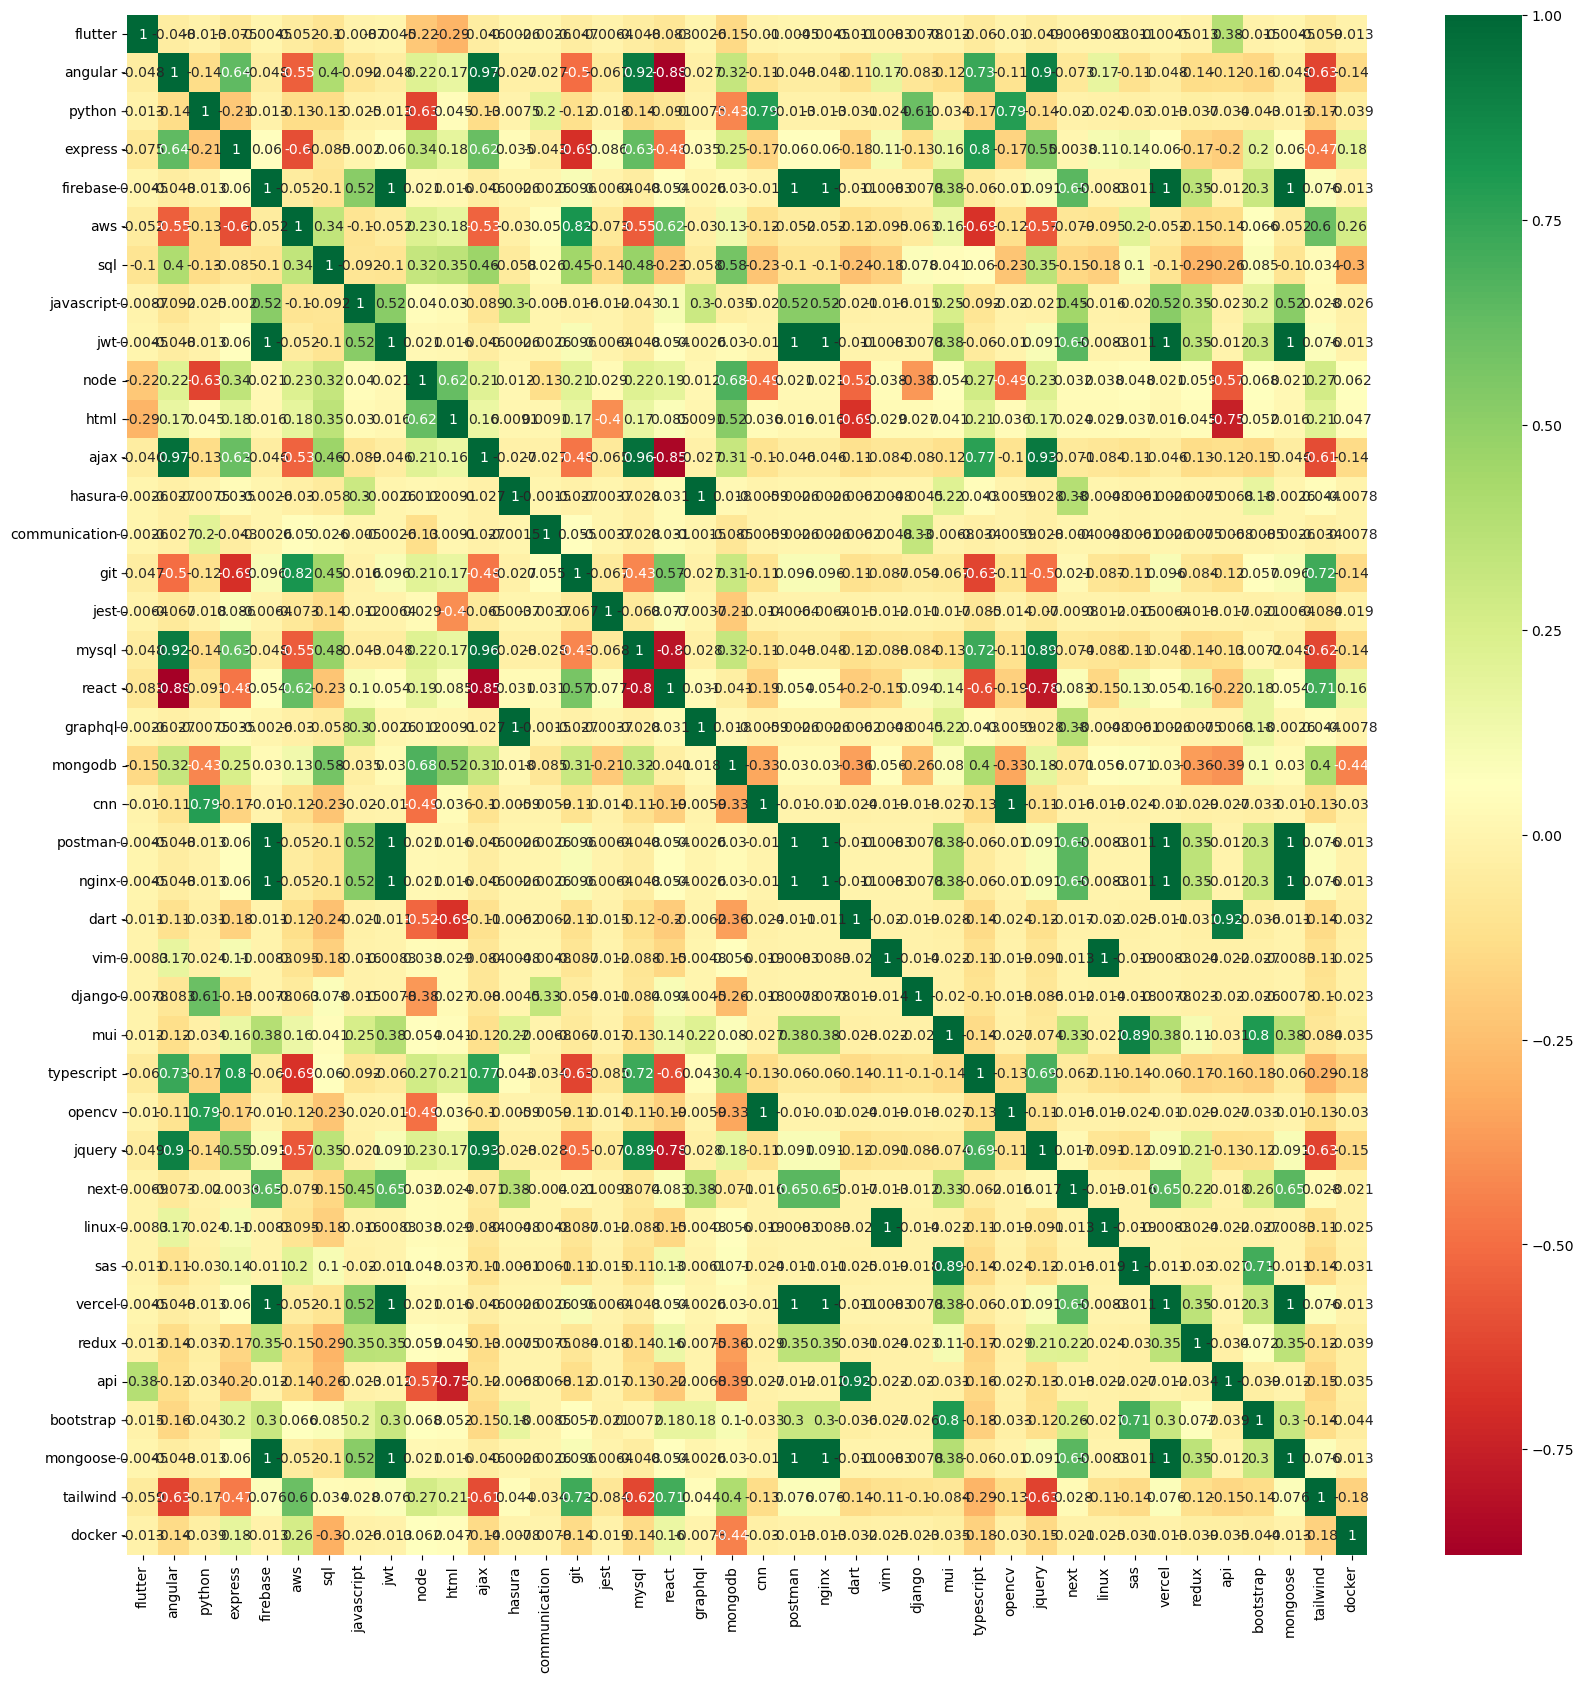

In [15]:
# Checking multicollinearity between skills
import matplotlib.pyplot as plt
import seaborn as sns

skills_df = df.iloc[:, 3:43]

#get correlations of each features in dataset
corrmat = skills_df.corr(numeric_only=True)
top_corr_features = corrmat.index

plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(skills_df.corr(),annot=True,cmap="RdYlGn")

There are multiple skills which shows strong postivie correlation with other skills whcih can lead to multicollinearity

In [16]:
skills_df.head()

,flutter,angular,python,express,firebase,aws,sql,javascript,jwt,node,...,next,linux,sas,vercel,redux,api,bootstrap,mongoose,tailwind,docker
0,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
threshold = 0.85
highly_correlated = set()

# Iterate over the correlation matrix and find highly correlated pairs
for i in range(len(corrmat.columns)):
    for j in range(i):
        if abs(corrmat.iloc[i, j]) > threshold:
            col_i = corrmat.columns[i]
            col_j = corrmat.columns[j]
            highly_correlated.add(col_i)

In [24]:
skills_df_filtered = skills_df.drop(highly_correlated, axis=1)
skills_df_filtered.head()

,flutter,angular,python,express,firebase,aws,sql,javascript,node,html,...,dart,vim,django,mui,typescript,next,redux,bootstrap,tailwind,docker
0,0,1,0,1,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,1,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,1,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,1,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,1,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [25]:
skills_df_filtered.columns

Index(['flutter', 'angular', 'python', 'express', 'firebase', 'aws', 'sql',
       'javascript', 'node', 'html', 'hasura', 'communication', 'git', 'jest',
       'mongodb', 'cnn', 'dart', 'vim', 'django', 'mui', 'typescript', 'next',
       'redux', 'bootstrap', 'tailwind', 'docker'],
      dtype='object')

* 14 skill columns are identified as showing high multicollinearity with other skills

In [28]:
highly_correlated

{'ajax',
 'api',
 'graphql',
 'jquery',
 'jwt',
 'linux',
 'mongoose',
 'mysql',
 'nginx',
 'opencv',
 'postman',
 'react',
 'sas',
 'vercel'}

* It seem `api`, `graphql`, `react` and `jwt` can be included dataset

In [29]:
cols_keep = ['api', 'graphql', 'react', 'jwt']

cols_drop = [ col for col in highly_correlated if col not in cols_keep]
cols_drop

['sas',
 'mysql',
 'postman',
 'mongoose',
 'opencv',
 'nginx',
 'jquery',
 'vercel',
 'linux',
 'ajax']

In [30]:
df.head()

,age,avg_time,week_back,flutter,angular,python,express,firebase,aws,sql,...,domain_webdev_django,domain_webdev_django_angular,domain_webdev_django_react,cs_bg,experience_1,experience_2,holidays,graduated,designation_encoded,salary
0,22.0,9.0,0.0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,124,3.00
1,21.0,12.0,2.0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,1,124,2.16
2,22.0,9.0,4.0,0,1,0,1,0,0,1,...,1,0,0,1,1,0,1,1,95,2.40
3,23.0,11.0,7.0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,1,1,116,3.55
4,22.0,10.0,4.0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,124,2.40


In [31]:
# Dropping highly correlated columns
df = df.drop(cols_drop, axis=1)
df.head()

,age,avg_time,week_back,flutter,angular,python,express,firebase,aws,sql,...,domain_webdev_django,domain_webdev_django_angular,domain_webdev_django_react,cs_bg,experience_1,experience_2,holidays,graduated,designation_encoded,salary
0,22.0,9.0,0.0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,124,3.00
1,21.0,12.0,2.0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,1,124,2.16
2,22.0,9.0,4.0,0,1,0,1,0,0,1,...,1,0,0,1,1,0,1,1,95,2.40
3,23.0,11.0,7.0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,1,1,116,3.55
4,22.0,10.0,4.0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,124,2.40


* Removed 10 Skills with multicollinearity